<a href="https://colab.research.google.com/github/luis8choa/Computer_Vision/blob/main/Object_Detection_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Utilizando un dataset de object detection: Importando el dataset de conduccion autonoma.

In [12]:
!pip install opencv.python.headless==4.3.0.38 #Ideally 4.1.2.30

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 7.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [13]:
import os
import pathlib
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
#Este repositorio nos brinda funcionalidades que nos vana. ayudar a trabajar con nuestro datasrt de object detecion

In [15]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 90251, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 90251 (delta 18), reused 27 (delta 11), pack-reused 90205
Receiving objects: 100% (90251/90251), 604.92 MiB | 19.03 MiB/s, done.
Resolving deltas: 100% (65040/65040), done.


In [16]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .
#instalacion de paquete de object detection de tensorflow

Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━

In [17]:
!pip install tensorflow==2.8.0
#originalmente 2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing 

In [18]:
from object_detection.utils import visualization_utils as viz_utils

In [19]:
import tensorflow as tf

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!unzip '/content/drive/MyDrive/object_detection_projects_datasets/Self_Driving_Cars.zip'

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: images/1479502279230178611.jpg  
  inflating: images/1479502279730506173.jpg  
  inflating: images/1479502280230536426.jpg  
  inflating: images/1479502280730839737.jpg  
  inflating: images/1479502281729824146.jpg  
  inflating: images/1479502282229848985.jpg  
  inflating: images/1479502282730102580.jpg  
  inflating: images/1479502283731724690.jpg  
  inflating: images/1479502284232432719.jpg  
  inflating: images/1479502285221790200.jpg  
  inflating: images/1479502285730163274.jpg  
  inflating: images/1479502286231098378.jpg  
  inflating: images/1479502287230097438.jpg  
  inflating: images/1479502287730246905.jpg  
  inflating: images/1479502288231261057.jpg  
  inflating: images/1479502288731301852.jpg  
  inflating: images/1479502289730529475.jpg  
  inflating: images/1479502290232668314.jpg  
  inflating: images/1479502291230742118.jpg  
  inflating: images/1479502292231318149.jpg  
  inflating: 

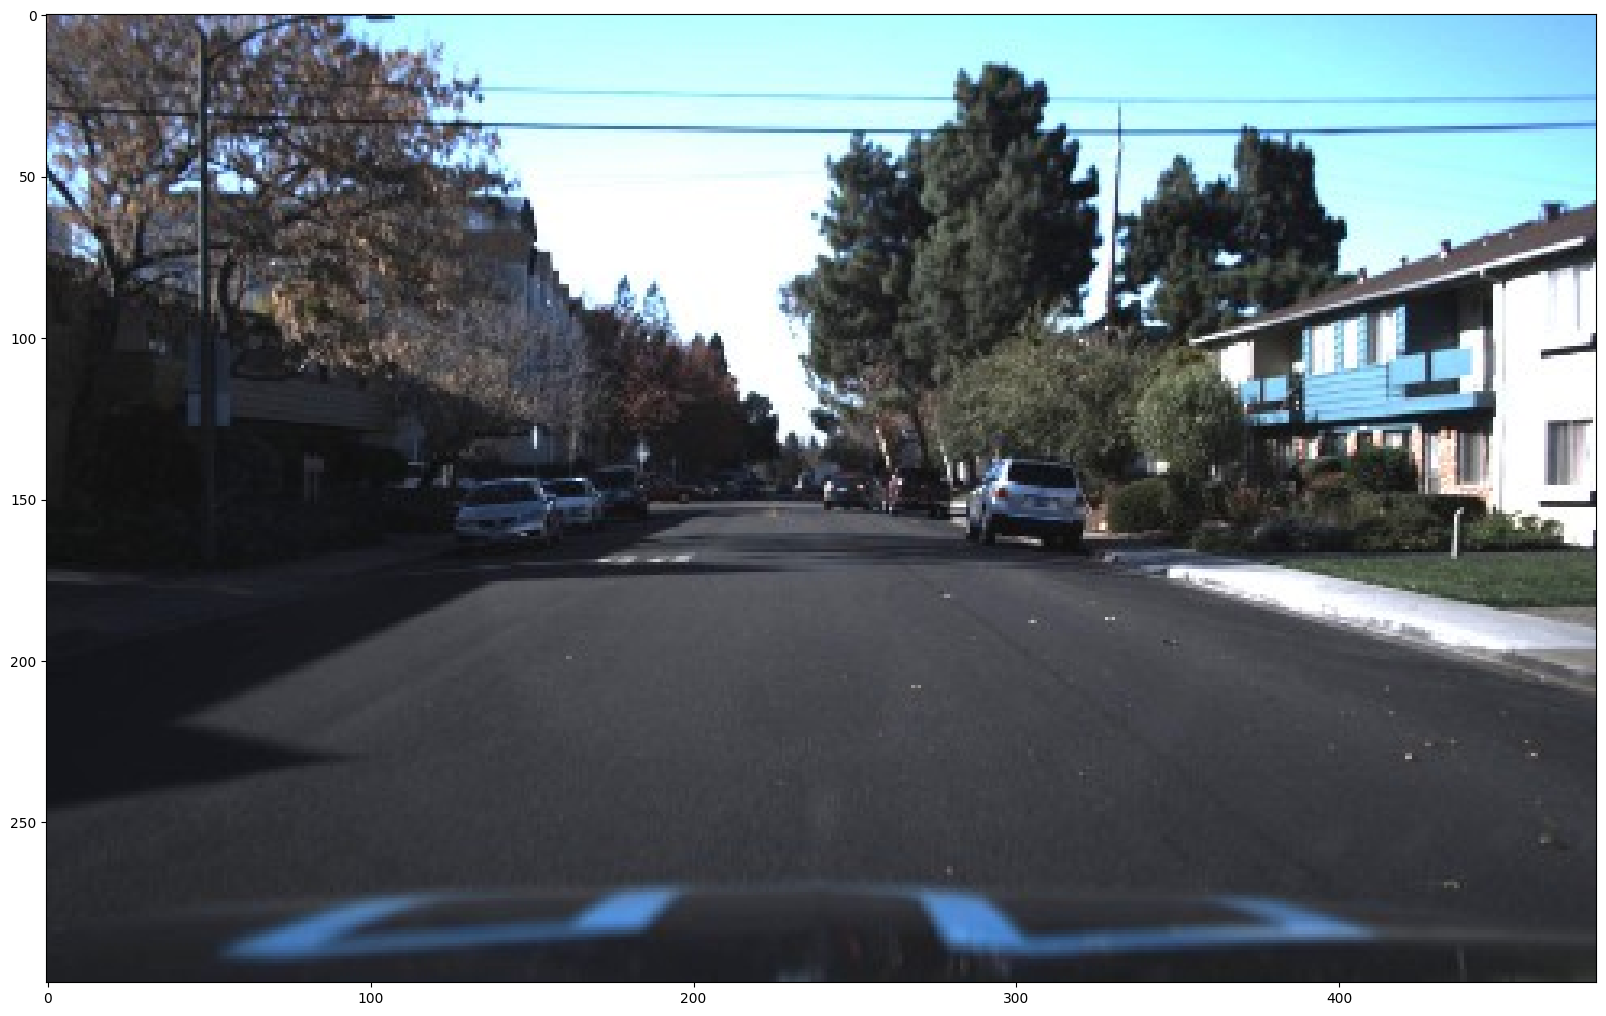

In [22]:
%matplotlib inline
plt.figure(figsize=(20,20))
img = cv2.imread('images/1479506176491553178.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


# 2. Utilizando un dataset de object detection:visulizacion del dataset de conduccion autonoma

In [23]:
df = pd.read_csv("labels_train.csv")

In [24]:
df
#1-car
#2-truck
#3-pedestrian
#4-byciclist
#5-light

frame  xmin  xmax  ymin  ymax  class_id
0       1478019952686311006.jpg   237   251   143   155         1
1       1478019952686311006.jpg   437   454   120   186         3
2       1478019953180167674.jpg   218   231   146   158         1
3       1478019953689774621.jpg   171   182   141   154         2
4       1478019953689774621.jpg   179   191   144   155         1
...                         ...   ...   ...   ...   ...       ...
132401  1479506176491553178.jpg   166   186   139   156         1
132402  1479506176491553178.jpg   182   204   142   153         1
132403  1479506176491553178.jpg   239   261   139   155         1
132404  1479506176491553178.jpg   259   280   139   157         1
132405  1479506176491553178.jpg   284   324   137   168         1

[132406 rows x 6 columns]

In [25]:
print(img.shape)

(300, 480, 3)


In [26]:
gt_boxes={}
for index, row in df.iterrows(): #iteramos en cada columna
  if row["class_id"] == 3:
    #Generacion de bounding box, crear un array de np con ese bounding box.
    #guardamos als posiciones y los normalizamos entre 0 y 1
    bbox = np.array([[row["ymin"]/300, row["xmin"]/480, row["ymax"]/300, row["xmax"]/480]], dtype=np.float32)
    #print(bbox)

    #guardamos esos bounding boxes dentro del diccionario,
    #pero revisamos dentro de nuestro diccionario ya esciste esa clave,
    #si ya existen bounding boxes para una determinad imagen o aun no
    if row["frame"] in gt_boxes: #si esta
      gt_boxes[row["frame"]] = np.append(gt_boxes[row["frame"]], np.array(bbox), axis=0)
      #añadir esto a lo que ya se tiene con el nuevo boundin box.
    else: #en caso de que no exista, se debe crear la nueva clave
      gt_boxes[row["frame"]] = np.array(bbox)


In [27]:
my_path = "images/"
train_images_np = []

for image in gt_boxes.keys():
  im = cv2.imread(my_path + image)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  train_images_np.append(im)

In [28]:
#Queremos que en la parte superior de un bounding box aparezca
# el nombre de la etiqueta

In [29]:
pedestrian_class_id = 1 #cuz esa elegimos duh.
#Clase 0 se considera el background de la imagen y siempre esta
#reservado para ello.
num_classes = 1

category_index = {
    num_classes: {
        "id": pedestrian_class_id,
        "name": "pedestrian"
    }
}
#nombre que aparecera en nuestro bounding box una vez lo mostremos

# 3. Utilizando un dataset de object detection: visualiacion final

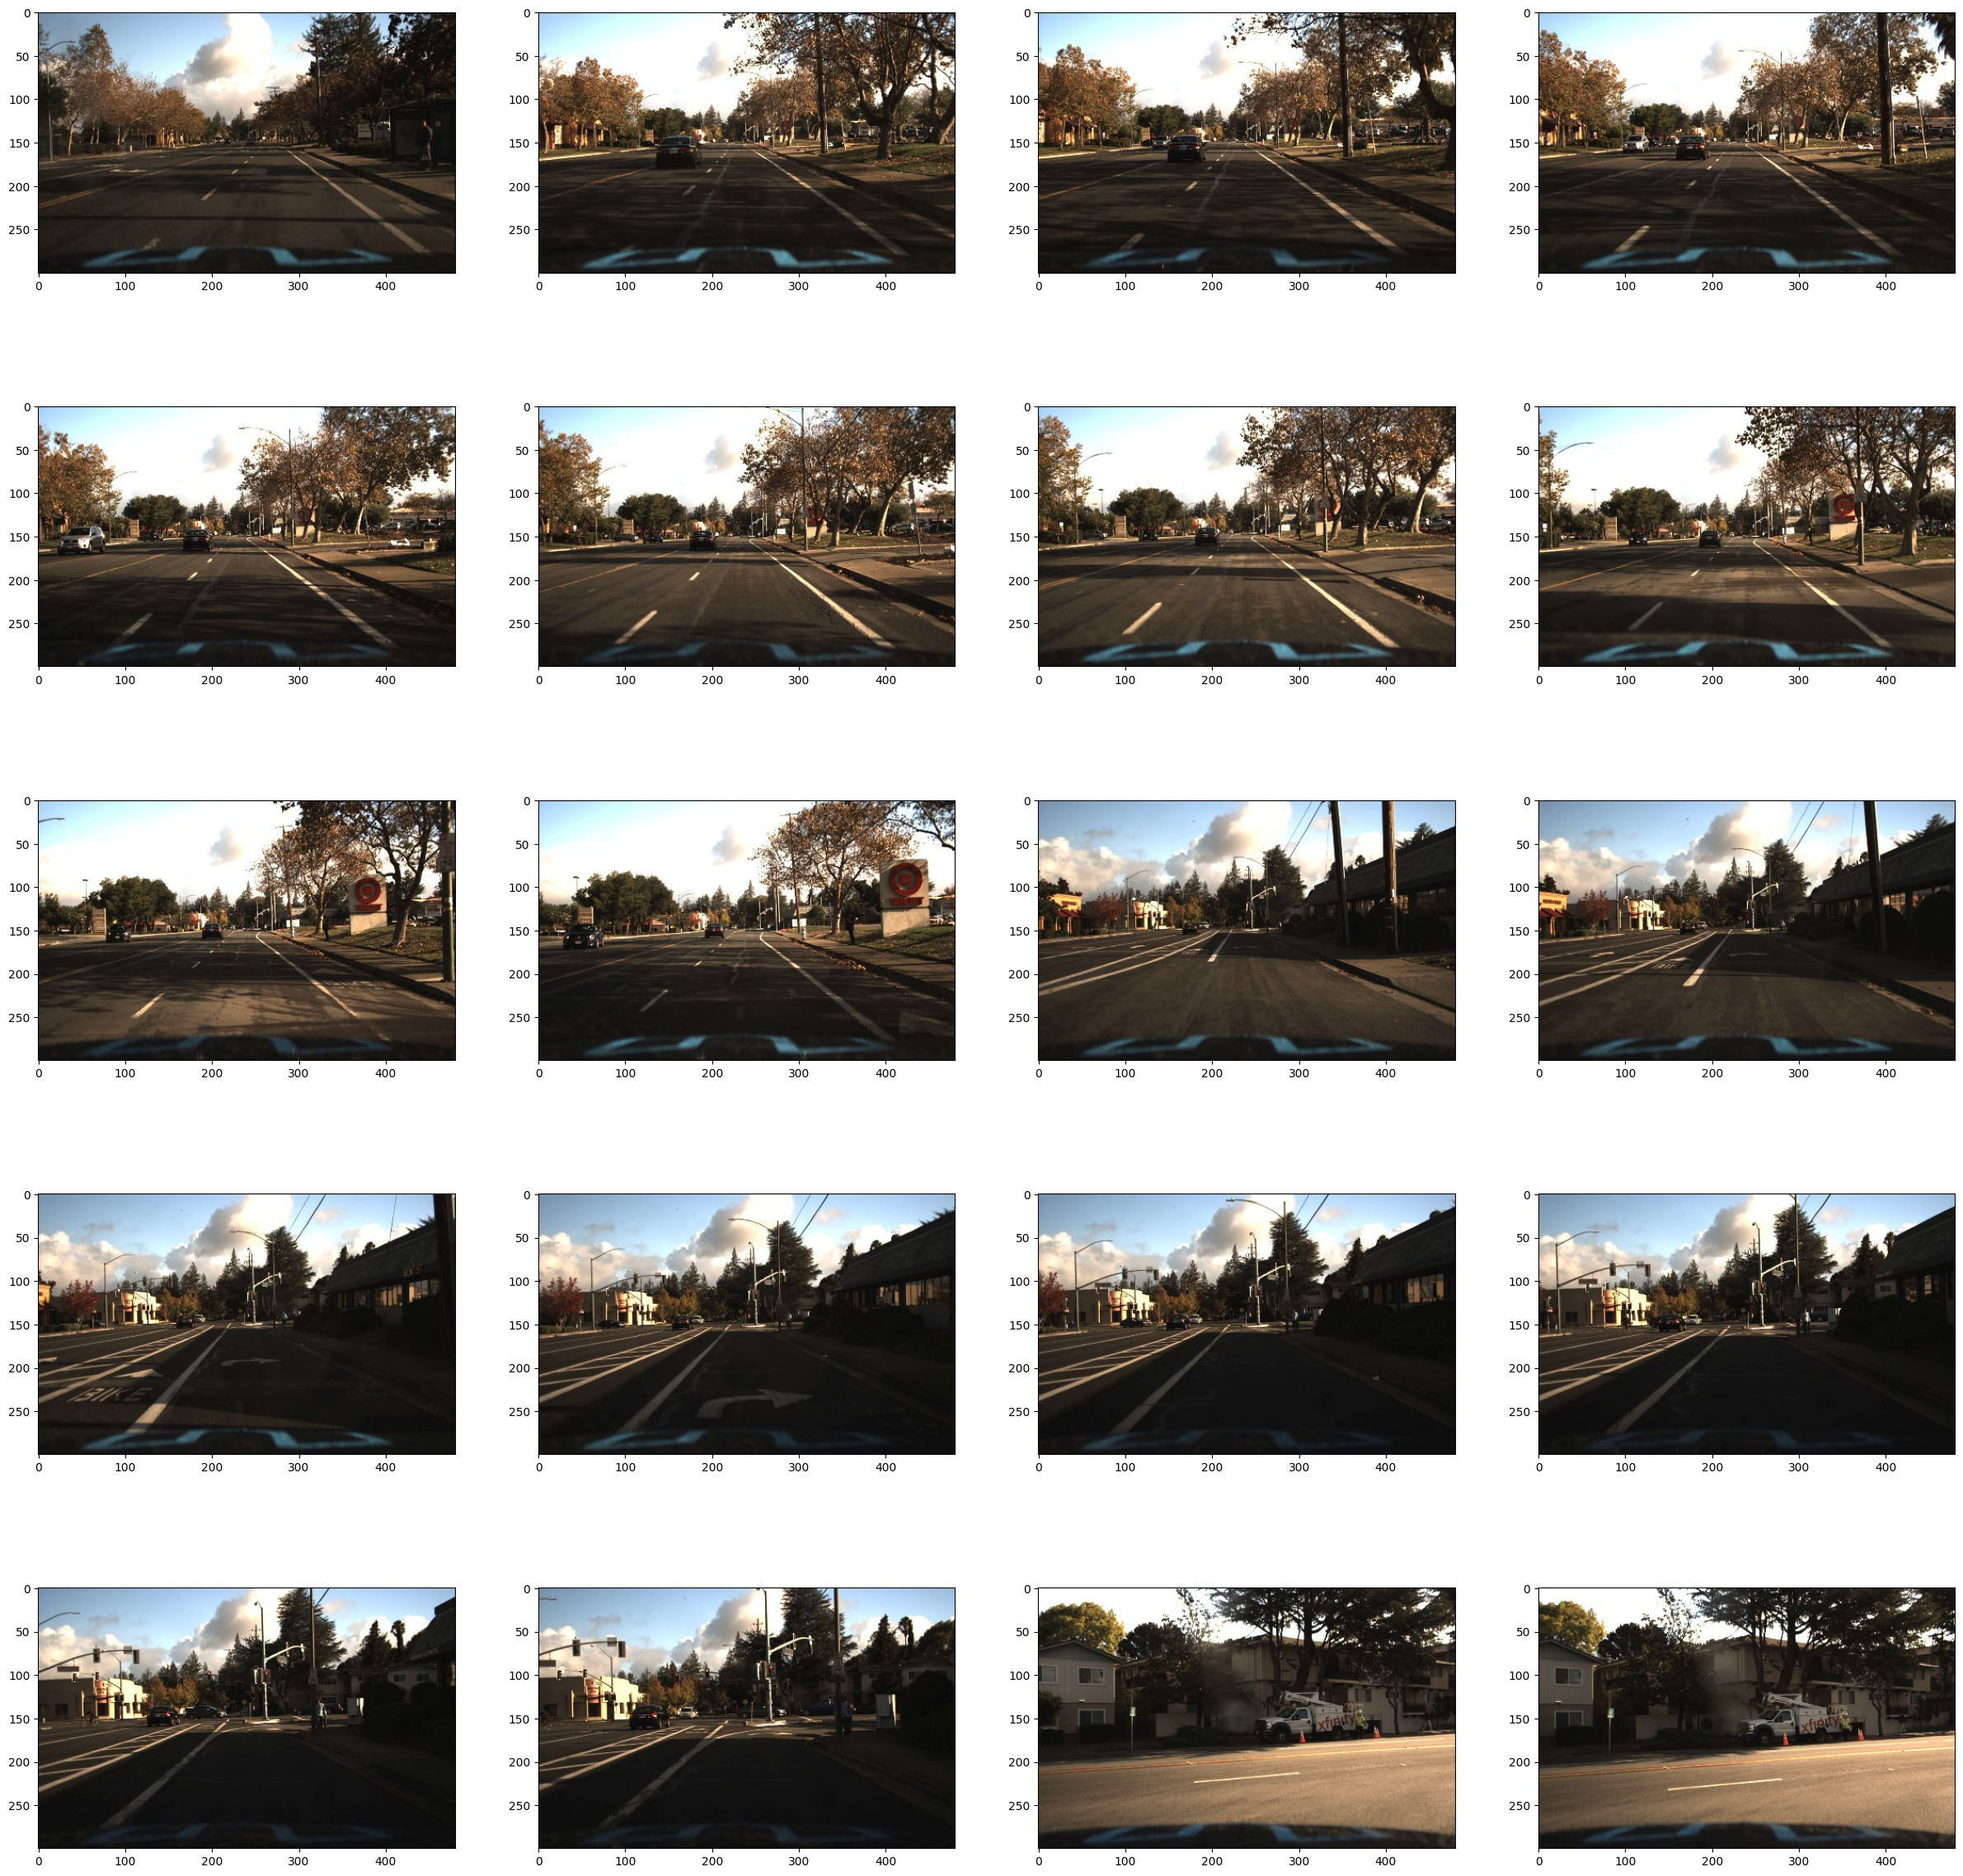

In [30]:
def plot_detections(image_np, boxes, classes, scores, category_index):
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True, #Ya normalizamos las coordenadas
      #anteriormente
      min_score_thresh=0.5 #que porcentaje necesita para ser considerado
      #y tomado en cuenta
  )
  plt.imshow(image_np_with_annotations)

plt.figure(figsize=(30,30))
for idx in range(0,20):
  bboxes = list(gt_boxes.values())[idx]
  #tomamos esos bboxes de nuestro diccionario.
  #acotamos al inice requerido.
  dummy_score = np.ones(shape=[bboxes.shape[0]], dtype=np.float32)
  #numero de puntuaciones para cada bbox.
  #NOTA: en ESTE caso formamos un array de 1(100%)
  #con la forma del numero de boundix boxes que tiene en concreto
  #una imagen. con la forma en el eje 0 (filas).
  plt.subplot(5,4,idx+1)
  plot_detections( #dibujar bounding boxes
      train_images_np[idx],
      bboxes,
      np.ones(shape=[bboxes.shape[0]], dtype=np.int32), #sera un array de unos por que solo tenemos
      #la clase uno, es decir peatones.
      dummy_score,
      category_index
  )

plt.show()

# 2. Aumentando de datos con Albumentations

In [31]:
!pip install albumentations==1.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 14.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-image: filename=scikit_image-0.18.3-cp310-cp310-linux_x86_64.whl size=36041326 sha256=ee65c81938540ee4df948efec8008ecc97846164815a91a96322a01b69c04dc6
  Stored in directory: /root/.cache/pip/wheels/9d/55/80/c5bf730bc10906b1518cd6ebc05c87e69d1c46099ebdc9f59f
Successfully built scikit-image
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.3.1
    Uninstalling albumentations-1.3.1:
      Successfully uninstalled albumentations-1.3.1


In [32]:
import albumentations as A

In [33]:
transforms = A.Compose([ #composicion de transformaciones
    A.HorizontalFlip(p=0.8), #probabilidad de 0.8
    A.RandomBrightnessContrast(p=0.8),
], bbox_params=A.BboxParams(format="albumentations")) #Como estamos trabajndo un problema de object detection debemos pasarles
#los bounding boxes, para que teniendo en cuenta las modificaciones
#a la imagen, asi mismo cambien los bounding boxes.

#Le decimos el formato de albumentations, en nuestro caso este formato se acomoda
#mas a nuestro problema

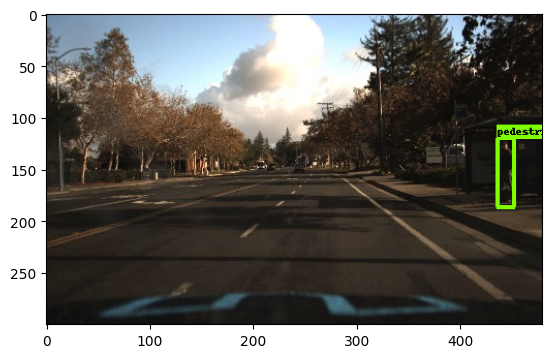

In [34]:
#visualizacion imagen cruda sin transformadas
plt.figure()
plt.imshow(train_images_np[0])

In [35]:
bbox = list(gt_boxes.values())[0][0]

In [36]:
print(bbox)

[0.4        0.91041666 0.62       0.9458333 ]


In [37]:
bbox = [bbox[1], bbox[0], bbox[3], bbox[2]]
# generamos el bounding boxes cambiando posiciones
#posicion 0 por la 1 y la posicion 3 por la 2

In [38]:
bbox.append("pedestrian")

In [39]:
bbox = [bbox] #podriamos tener una lista de bounding boxes para
#pasarlos, en este caso solo vamos a tener uno.

In [40]:
transformed_image_1 = transforms(image=train_images_np[0], bboxes=bbox)

In [41]:
#Apartir de las misma imagen y mismo bounding box
transformed_image_2 = transforms(image=train_images_np[0], bboxes=bbox)
transformed_image_3 = transforms(image=train_images_np[0], bboxes=bbox)

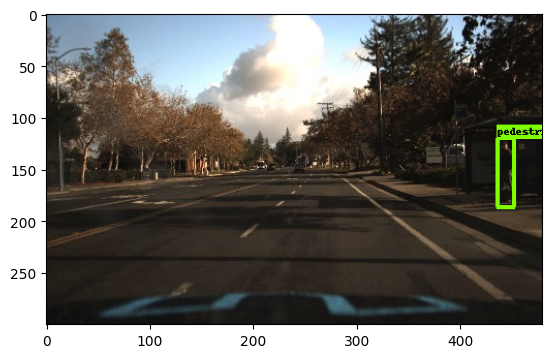

In [42]:
plt.figure()
plot_detections(
    train_images_np[0],
    np.array([list(gt_boxes.values())[0][0]]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_score,
    category_index
)

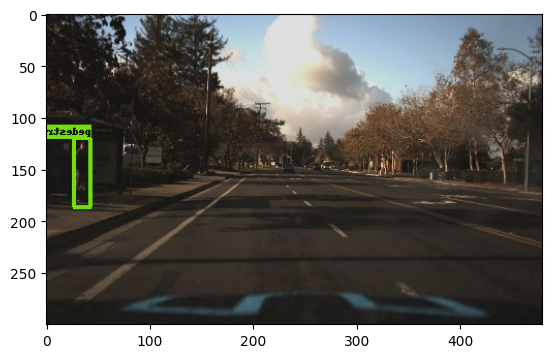

In [43]:
transformed_bbox_1 = (list(transformed_image_1["bboxes"][0])[:-1])
#buscamos en la imagen transformada, nos quedamos con
#la bounding box 0 , reordenamos desde el ultimo hasta el primero
transformed_bbox_1 = [transformed_bbox_1[1], transformed_bbox_1[0], transformed_bbox_1[3], transformed_bbox_1[2]]
plt.figure()
plot_detections(
    transformed_image_1['image'],
    np.array([transformed_bbox_1]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_score,
    category_index
)

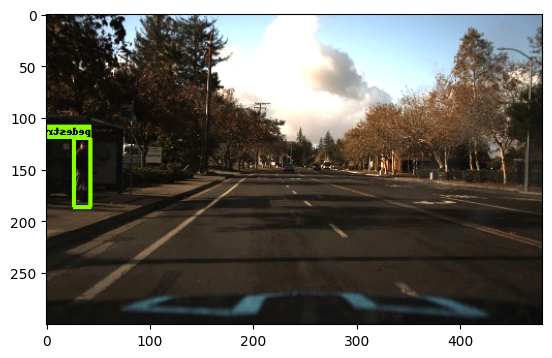

In [44]:
transformed_bbox_2 = (list(transformed_image_2['bboxes'][0])[:-1])
transformed_bbox_2 = [transformed_bbox_2[1], transformed_bbox_2[0], transformed_bbox_2[3], transformed_bbox_2[2]]
plt.figure()
plot_detections(
    transformed_image_2['image'],
    np.array([transformed_bbox_2]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_score,
    category_index
)

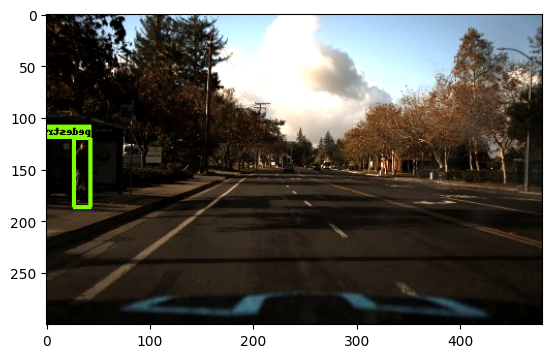

In [45]:
transformed_bbox_3 = (list(transformed_image_3['bboxes'][0])[:-1])
transformed_bbox_3 = [transformed_bbox_3[1], transformed_bbox_3[0], transformed_bbox_3[3], transformed_bbox_3[2]]
plt.figure()
plot_detections(
    transformed_image_3['image'],
    np.array([transformed_bbox_3]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_score,
    category_index
)

# 5. Uilizando un modelo de object detection pre-entrenado.

In [54]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2024-01-03 23:36:33--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.152.207, 142.250.159.207, 142.251.120.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.152.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M  98.9MB/s    in 2.4s    

2024-01-03 23:36:35 (98.9 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [55]:
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
#descomprimimos con las flags -xf
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint models/research/object_detection/test_data/
#Tomamos el modelo y lo movemos a una direccion especifica

In [56]:
from object_detection.utils import config_util
from object_detection.builders import model_builder

In [57]:
model_name = "ssd_resnet50_v1_fpn_640x640_coco17_tpu-8"
pipeline_config = os.path.join("models/research/object_detection/configs/tf2/" + model_name + ".config")
model_dir = "models/research/object_detection/test_data/checkpoint/"

In [58]:
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs["model"]
detection_model = model_builder.build(model_config=model_config, is_training=False)

In [59]:
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(model_dir, "ckpt-0")).expect_partial()

In [60]:
def get_model_detection_function(model):

  @tf.function
  def detect_fn(image):
    image, shape = model.preprocess(image)
    prediction_dict = model.predict(image,shape)
    detections = model.postprocess(prediction_dict, shape)

    return detections

  return detect_fn

detect_fn = get_model_detection_function(detection_model)


In [61]:
from object_detection.utils import label_map_util

label_map_path = configs["eval_input_config"].label_map_path
label_map_path = "models/research/object_detection/data/mscoco_label_map.pbtxt"

label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True
)

category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [62]:
%matplotlib inline

img = cv2.imread("images/1479506175971257681.jpg")
image_np = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(image_np.shape)

(300, 480, 3)


In [63]:
input_tensor = tf.convert_to_tensor( #convertimos a tensor
    np.expand_dims(image_np, 0),
    dtype=tf.float32 #Añadimos dimension por si trabajamos con mas de una imagen
    #es decir, un array de imagenes. Realizaria la inferencia a todo el batch.
)
detections = detect_fn(input_tensor)

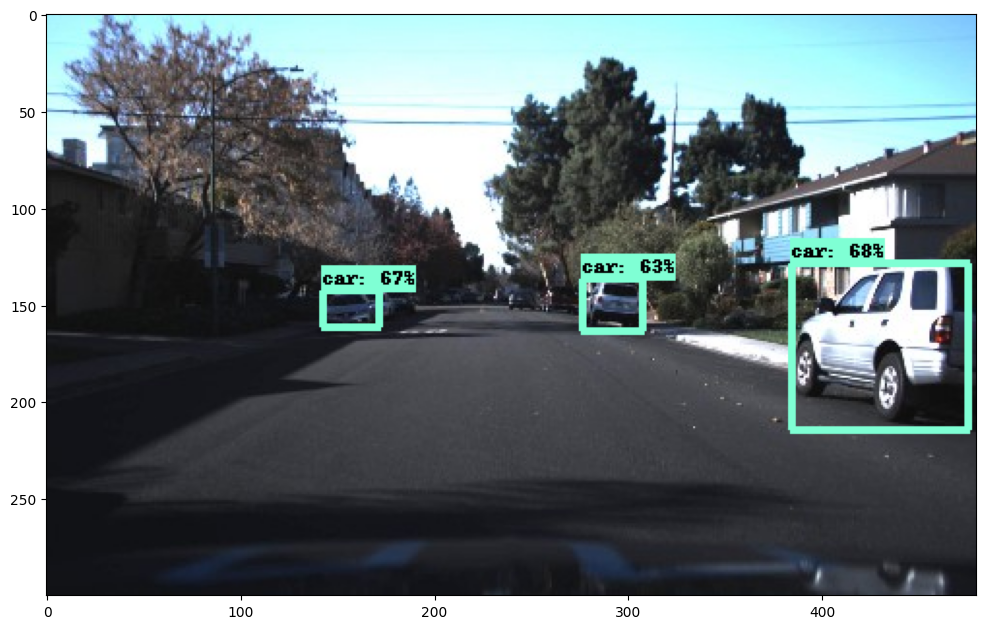

In [67]:
label_id_offset = 1
#descartamos la clase del background usando el offset
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections["detection_boxes"][0].numpy(),
    (detections["detection_classes"][0].numpy() + label_id_offset).astype(int),
    #Offset de las clases
    detections["detection_scores"][0].numpy(),
    category_index,
    use_normalized_coordinates=True,
    min_score_thresh=0.6
)

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.show()

## 6.Fine-tuning en object detection

In [68]:
from object_detection.utils import config_util
from object_detection.builders import model_builder

In [69]:
#El modelo preentrenado detectada 90 clases,
#En este proyecto y aplicacion didactica buscamos solo
#detectar una clase (pedestrian)

In [73]:
num_classes = 1 #Solo queremos detectar una clase
pipeline_config = "models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config"
checkpoint_path = "models/research/object_detection/test_data/checkpoint/ckpt-0"

In [74]:
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs["model"]

In [76]:
model_config.ssd.num_classes = num_classes
#modificamos la configuracion del modelo a una clase unicamente.
#Numero de clases definido anteriormente.

model_config.ssd.freeze_batchnorm = True
#congelamos la normalizacion del batch

#Indicamos que este modelo SI queremos entrenarlo
detection_model = model_builder.build(model_config=model_config, is_training=True)


In [78]:
#Una vez el modelo cargado, solo cargamos el checkpoint de la parte de regresion
# Respecto a clasificacion no lo cargaremos, puesto que es lo que queremos reentrenar

fake_box_predictor = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_from_heads = detection_model._box_predictor._base_tower_layers_for_heads,
    #Queremos cargar unicamente la parte de regresion
    _box_prediction_head=detection_model._box_predictor._box_prediction_head
)

In [79]:
fake_model = tf.compat.v2.train.Checkpoint(
    _feature_extractor=detection_model.feature_extractor,
    _box_predictor=fake_box_predictor
)

In [80]:
ckpt = tf.compat.v2.train.Checkpoint(model=fake_model)
#Cargamos un checkpoint con base en el modelo definido anteriormente
#El modelo queda guardado en fake_model

In [81]:
ckpt.restore(checkpoint_path).expect_partial()
#Restauramos el modelo.

#expect_partial(): Silence warnings about incomplete checkpoint
# restores. Warnings are otherwise printed for unused parts of
#the checkpoint file or object when the Checkpoint object is
#deleted (often at program shutdown).

In [82]:
image, shape = detection_model.preprocess(tf.zeros([1,640,640,3]))
#Generamos imagen dummy (del tamaño de entrada de nuestra
# imagen (una sola imagen))

In [84]:
prediction_dict = detection_model.predict(image, shape)
#Predecimos tanto con la imagen como con el shape

In [85]:
_ = detection_model.postprocess(prediction_dict, shape)
#No nos interesa el resultado.
#Llevamos a cabo el postprocesado, para terminar con la detection
#con esto ya tendremos los pesos cargados

In [86]:
df = pd.read_csv("labels_train.csv")
df


frame  xmin  xmax  ymin  ymax  class_id
0       1478019952686311006.jpg   237   251   143   155         1
1       1478019952686311006.jpg   437   454   120   186         3
2       1478019953180167674.jpg   218   231   146   158         1
3       1478019953689774621.jpg   171   182   141   154         2
4       1478019953689774621.jpg   179   191   144   155         1
...                         ...   ...   ...   ...   ...       ...
132401  1479506176491553178.jpg   166   186   139   156         1
132402  1479506176491553178.jpg   182   204   142   153         1
132403  1479506176491553178.jpg   239   261   139   155         1
132404  1479506176491553178.jpg   259   280   139   157         1
132405  1479506176491553178.jpg   284   324   137   168         1

[132406 rows x 6 columns]

In [ ]:
#Cargamos todos nuestros datos de entrenamiento
#Solo nos quedamos con los registros que contengan
#la clase pedestrian, la cual es la clase numero 3
new=df[df['class_id'=3]]
#Ademas para filtrar a aun menos ejemplos, nos quedamos solo con..
#las imagenes con un SOLO ejemplo de pedestrian.
#De esta manera tendremos un entrenamiento mas rapido

In [88]:
gt_boxes = []
images_added = []
images_multi_bbox = set()

for index, row in df.iterrows():
  if row["frame"] not in images_added and row["class_id"] == 3:
    #Si el frame no se encuentra en imagenes agregadas
    # Y es de la clase pedestrian
    images_added.append(row["frame"])
    #Nombre de la imagen

    bbox = np.array([[row["ymin"]/300, row["xmin"]/480,row["ymax"]/300, row["xmax"]/480]])
    #Guardamos esa unica bounding box por imagen
    #Debemos ademas normalizar. Dividimos cada coordenada entre
    #el numero de valores para su dimension
    gt_boxes.append(bbox)
  else:
    images_multi_bbox.add(row["frame"])
    #Aseguramos minimo numero de apariciones

In [95]:
id_x_to_delete = []
#Vemos que ids queremos eliminar
for x, image in enumerate(images_added):
  if image in images_multi_bbox:
    id_x_to_delete.append(x)
    # x representa el id de la imagen

In [96]:
new_gt_boxes = []
new_images_added = []
for x, gt_box in enumerate(gt_boxes):
  #recorremos denuevo el ground truth de los los bbox
  if x not in id_x_to_delete:
    #Si ese ejemplo no esta en los elementos que se quieren eliminar
    new_gt_boxes.append(gt_box)
    #Lo añadimos

In [97]:
for x, image in enumerate(images_added):
  if x not in id_x_to_delete:
    new_images_added.append(image)

In [98]:
gt_boxes = new_gt_boxes
images_added = new_images_added

In [99]:
my_path = "images/"
#Compromabos la ruta en nuestro explorador de archivos
train_image_np = []
print(len(images_added))
for image in images_added:
  im = cv2.imread(my_path+image)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  train_image_np.append(im)

21


In [101]:
label_id_offset = 1
#Offset de 1 para eliminar la clase 0 (background)
train_image_tensors = []
gt_classes_one_hot_tensors = []
gt_box_tensors = []
#Cambiamos todo a tensores


#Ahora recorremos los datos de entrenamiento de nuestras imagenes
# y vamis creando nuestros tensores

for (train_image_np, gt_box_np) in zip(train_image_np, gt_boxes):
  #Recorremos imagenes y bbox de ground truth
  train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(train_image_np, dtype=tf.float32), axis=0))
  #eje de columnas
  gt_box_tensors.append(tf.convert_to_tensor(gt_box_np, dtype=tf.float32))
  zero_indexed_ground_truth_classes = tf.convert_to_tensor(np.ones([gt_box_np.shape[0]], dtype=np.int32) - label_id_offset)
  #Le estamos dando la clase uno (np.ones) de tantos...
  #registros como en gt_box_np, le damos el tipo de datos y...
  # le restamos el offset de nuestra clase background.
  gt_classes_one_hot_tensors.append(tf.one_hot(zero_indexed_ground_truth_classes, num_classes))
  #Agregamos el ground truth de las clases indexadas a zero en one hot

In [105]:
print(len(train_image_tensors))

21


In [107]:
#Crear nuestra funcion de paso de entrenamiento:
#.Calculo de funcion de perdida
#.Aplicacion de perdida con gradiente
#.Definir parametros de entrenamiento
tf.keras.backend.set_learning_phase(True)
#Indicamos a tf que trabajaremos con entrenamiento

/usr/local/lib/python3.10/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [108]:
#Tres parametros ajustables para entrenamiento
batch_size = 10
#Basado en el numero de imagenes
learning_rate=0.01
num_batches = 200

In [110]:
trainable_variables = detection_model.trainable_variables
#Copiamos esas variables dentro de nuestro modelo
to_fine_tune = []
prefixes_to_train = [
    'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead',
    'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead'
]

for var in trainable_variables:
  #Recorremos esas variables
  if any([var.name.startswith(prefix) for prefix in prefixes_to_train]):
    #si el nombre de esa variable empieza con uno de los prefijos antes definidos
    to_fine_tune.append(var)

In [114]:
def get_model_train_step_function(model, optimizer, vars_to_fine_tune):

  @tf.function
  def train_step_fn(image_tensors,
                    groundtruth_boxes_list,
                    groundtruth_classes_list):
    shapes = tf.constant(batch_size * [[640,640,3]], dtype=tf.int32)
    #Tamaño de nuestro batch con base en el tamaño de las imagenes
    model.provide_groundtruth(
        groundtruth_boxes_list=groundtruth_boxes_list,
        groundtruth_classes_list= groundtruth_classes_list
    )

    with tf.GradienteTape() as tape:
      preprocessed_images = tf.concat(
      [detection_model.preprocess(image_tensor)[0]
          for image_tensor in image_tensors], axis=0
      )
      #preprocesamos esas imagenes de entrenamiento
      prediction_dict = model.predict(preprocessed_images,shape)
      #predecimos
      losses_dict = model.loss(prediction_dict,shapes)
      #Calculamos la perdida
      total_loss = losses_dict["Loss/localization_loss"] + losses_dict["Loss/classification_loss"]
      #Perdida en localizacion mas la perdida en la parte de clasificacion
      gradients = tape.gradients(total_loss,vars_to_fine_tune)
      #Tuneamos esas variables
      optimizer.apply_gradients(zip(gradients,vars_to_fine_tune))
      #Con base en el optimizador aplicamos los gradientes a las
      #variables a tunear de modo que las actualizamos.

    return total_loss

  return train_step_fn
